In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Road.csv')

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

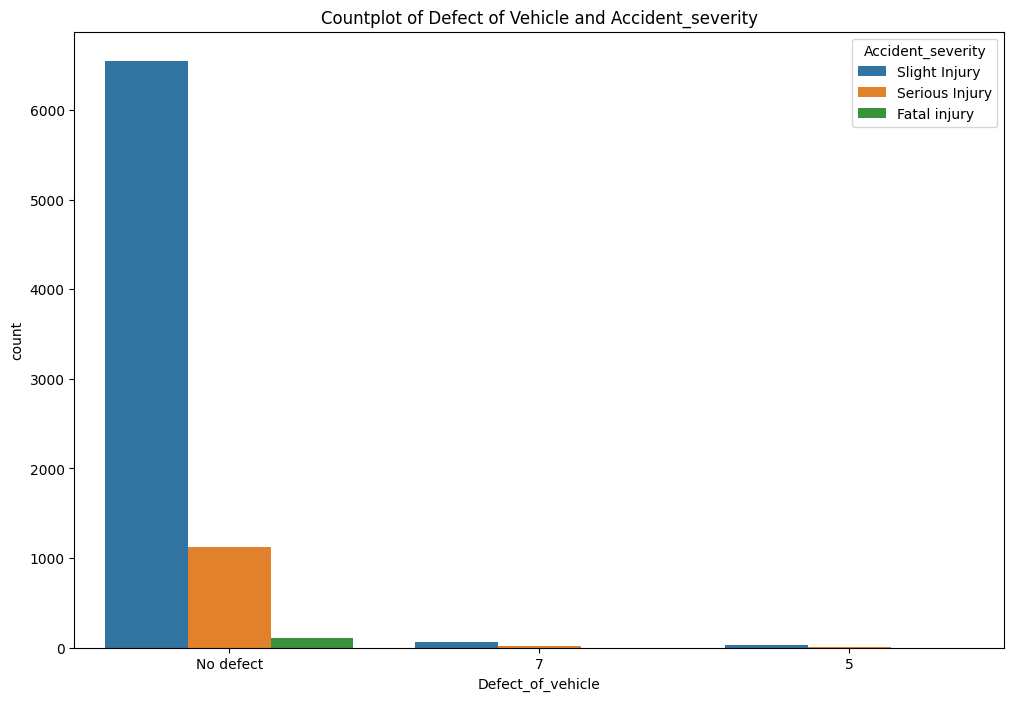

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(x='Defect_of_vehicle',hue='Accident_severity',data=df)
plt.title('Countplot of Defect of Vehicle and Accident_severity')
plt.show()

In [7]:
df.drop('Defect_of_vehicle',axis=1,inplace=True) 

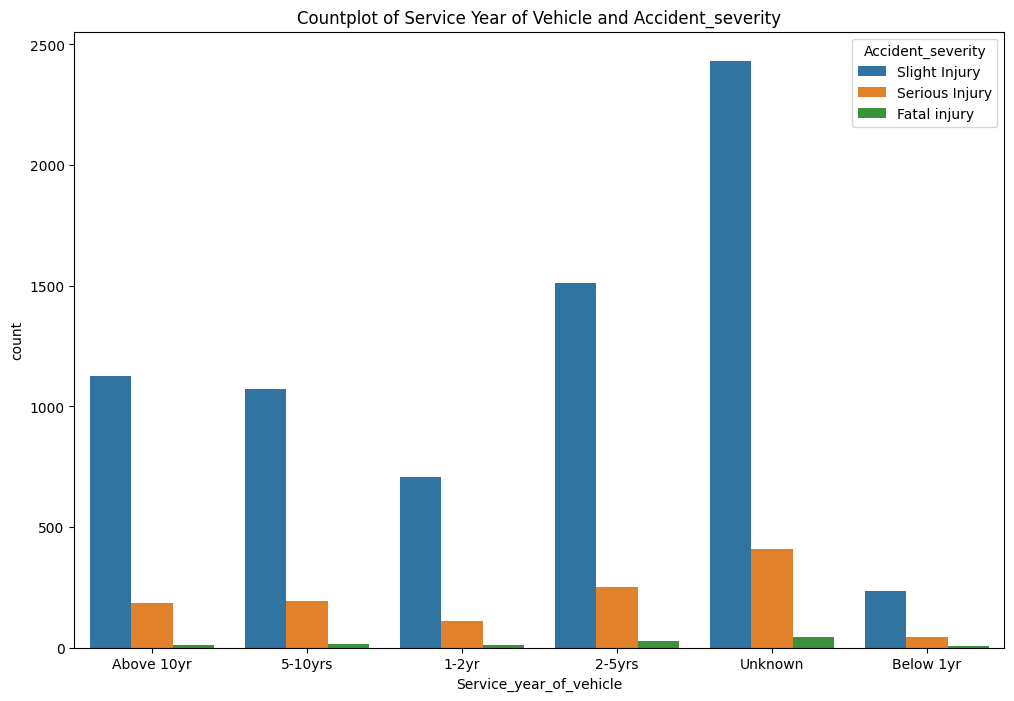

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='Service_year_of_vehicle',hue='Accident_severity',data=df)
plt.title('Countplot of Service Year of Vehicle and Accident_severity')
plt.show()

In [9]:
print((df['Service_year_of_vehicle'].value_counts()/12316)*100)
print("Nan values: ",(df['Service_year_of_vehicle'].isnull().sum()/12316)*100)

Service_year_of_vehicle
Unknown       23.408574
2-5yrs        14.550179
Above 10yr    10.750244
5-10yrs       10.392985
1-2yr          6.714842
Below 1yr      2.289704
Name: count, dtype: float64
Nan values:  31.893471906463137


In [10]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0])

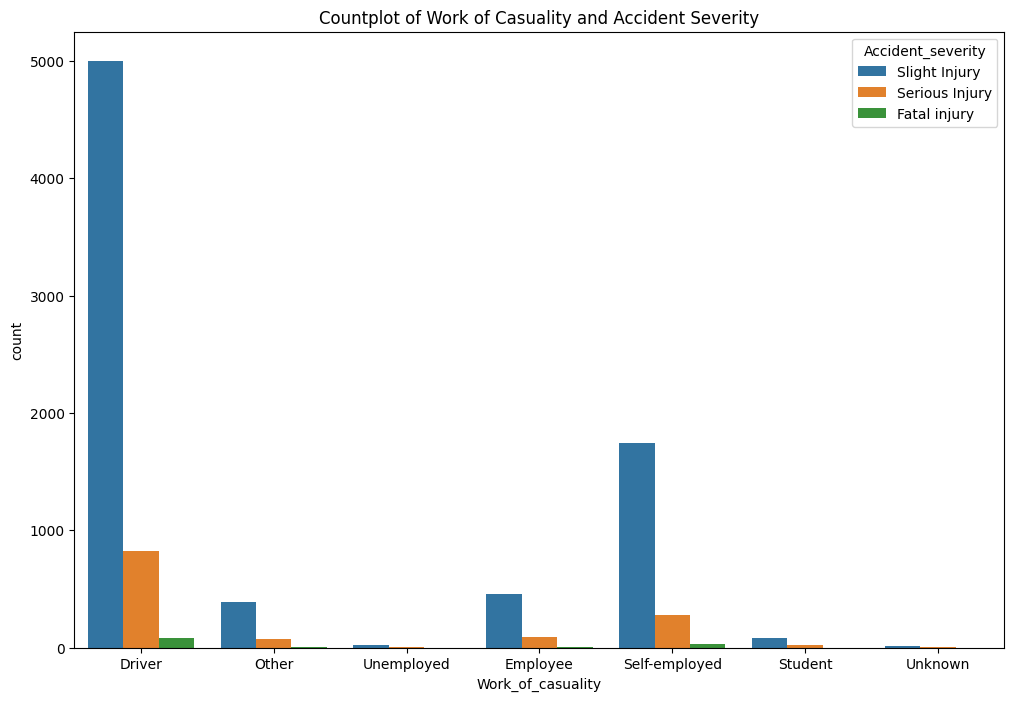

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x='Work_of_casuality',hue='Accident_severity',data=df)
plt.title("Countplot of Work of Casuality and Accident Severity")
plt.show()

In [12]:
df['Work_of_casuality'].fillna('Unknown',inplace=True)

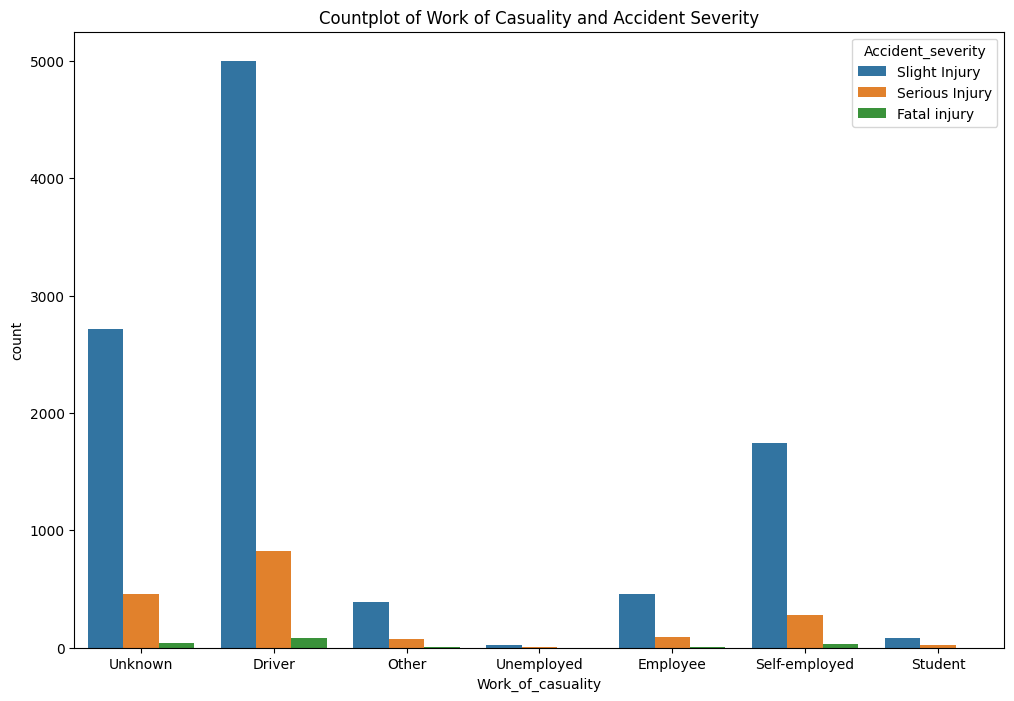

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='Work_of_casuality',hue='Accident_severity',data=df)
plt.title("Countplot of Work of Casuality and Accident Severity")
plt.show()

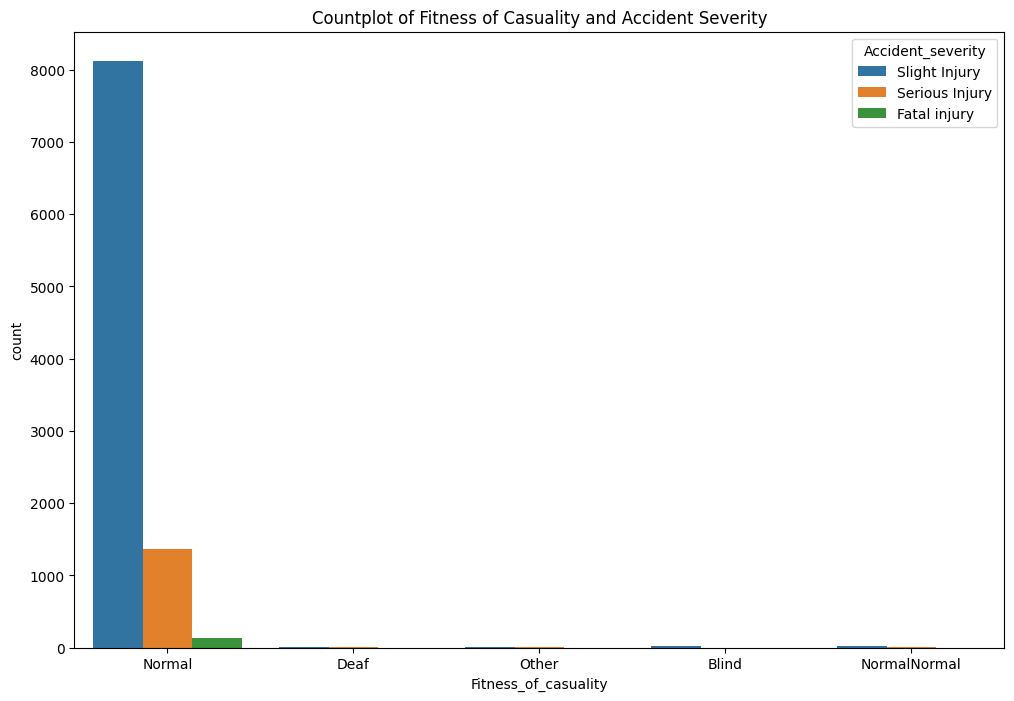

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='Fitness_of_casuality',hue='Accident_severity',data=df)
plt.title("Countplot of Fitness of Casuality and Accident Severity")
plt.show()

In [15]:
df.drop('Fitness_of_casuality',axis=1,inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,8439.000000,8439.000000
mean,2.038038,1.547340
std,0.680789,1.014755
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [18]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

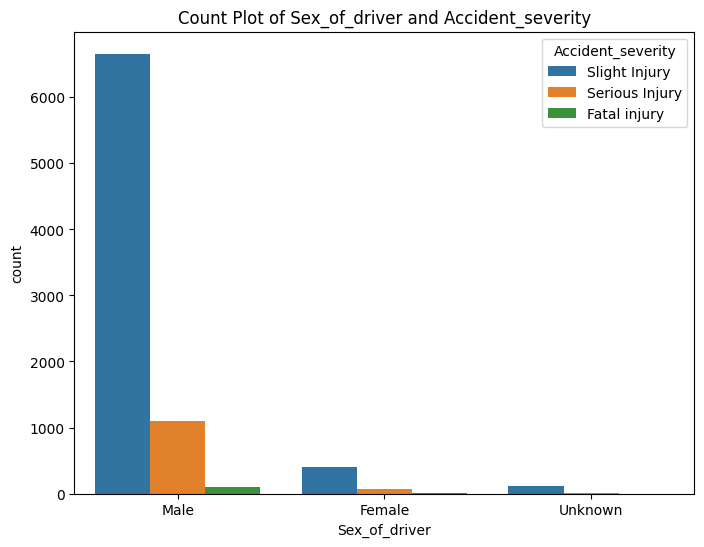

In [19]:
# Example 1: Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex_of_driver', hue='Accident_severity', data=df)
plt.title('Count Plot of Sex_of_driver and Accident_severity')
plt.show()

## Slight injuries are more common in injuries and males are more prone to accidents

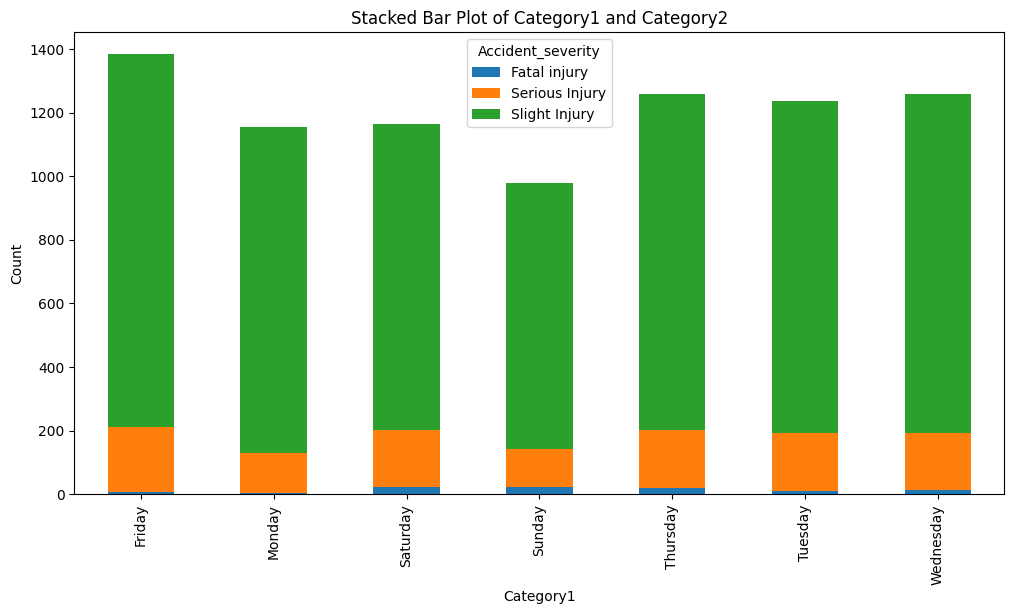

In [20]:
cross_tab = pd.crosstab(df['Day_of_week'], df['Accident_severity'])
cross_tab.plot(kind='bar',stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of Category1 and Category2')
plt.xlabel('Category1')
plt.ylabel('Count')
plt.show()

## Friday has the most chances of accidents happening then thursday and Tuesday

In [21]:
pd.crosstab(df['Day_of_week'], df['Accident_severity'])

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Day_of_week,,,
Friday,8,204,1172
Monday,5,124,1027
Saturday,24,178,964
Sunday,22,120,838
Thursday,18,185,1055
Tuesday,10,181,1046
Wednesday,12,179,1067


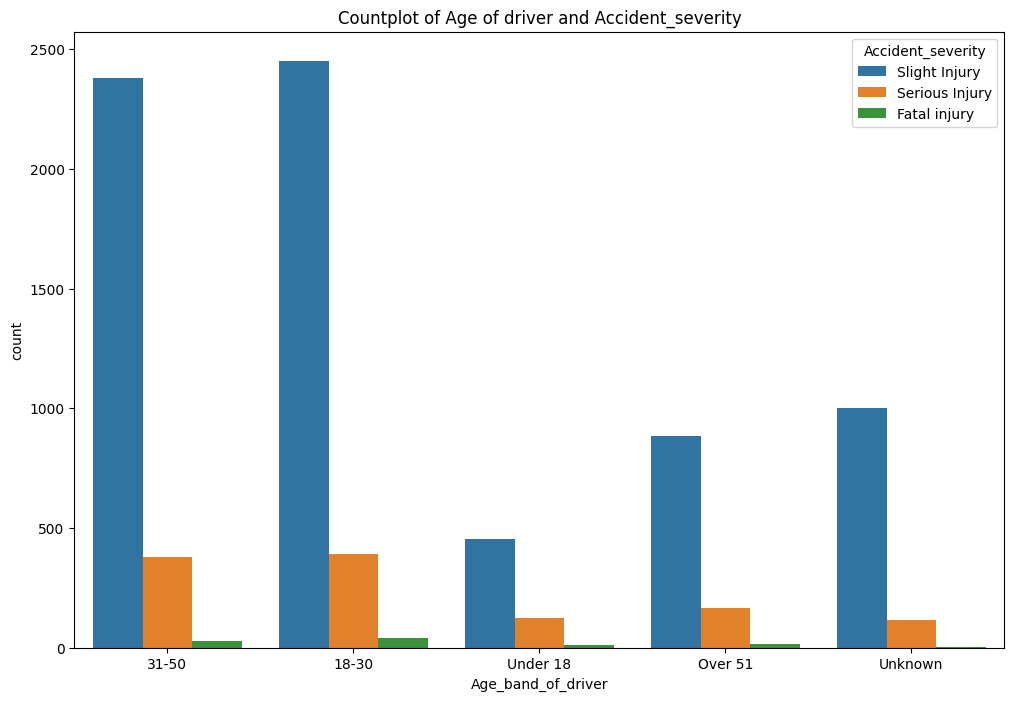

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age_band_of_driver',hue='Accident_severity',data=df)
plt.title('Countplot of Age of driver and Accident_severity')
plt.show()

## 18 to 30 Age People are more prone to accidents then after 31 to 50 Age People

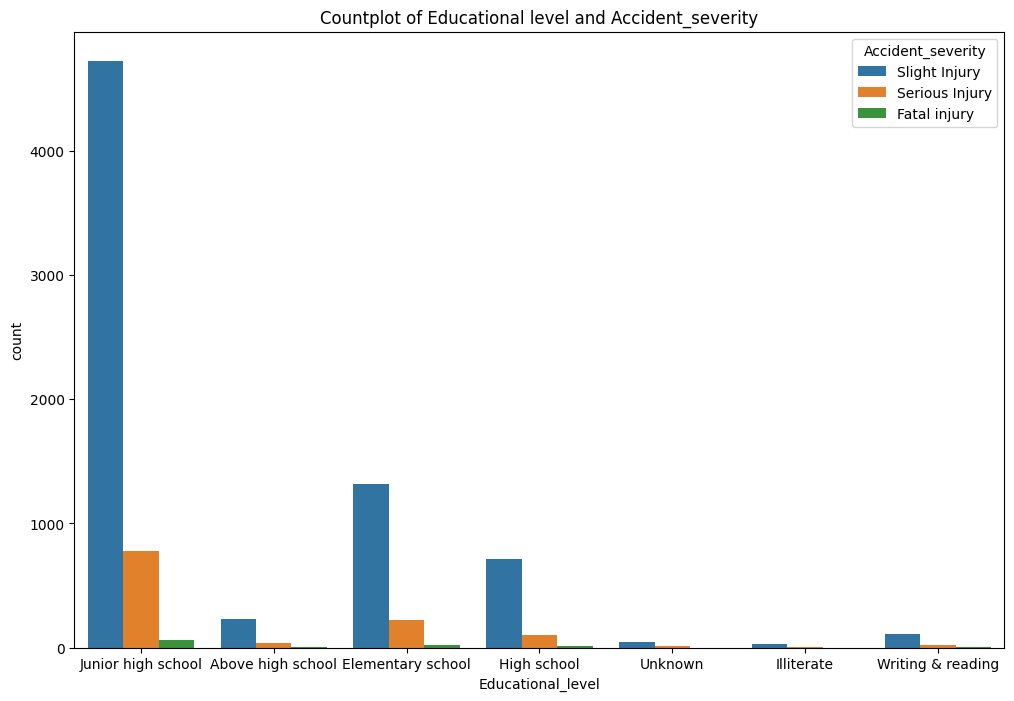

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='Educational_level',hue='Accident_severity',data=df)
plt.title('Countplot of Educational level and Accident_severity')
plt.show()

## Junior High School Students have higher risk of accidents

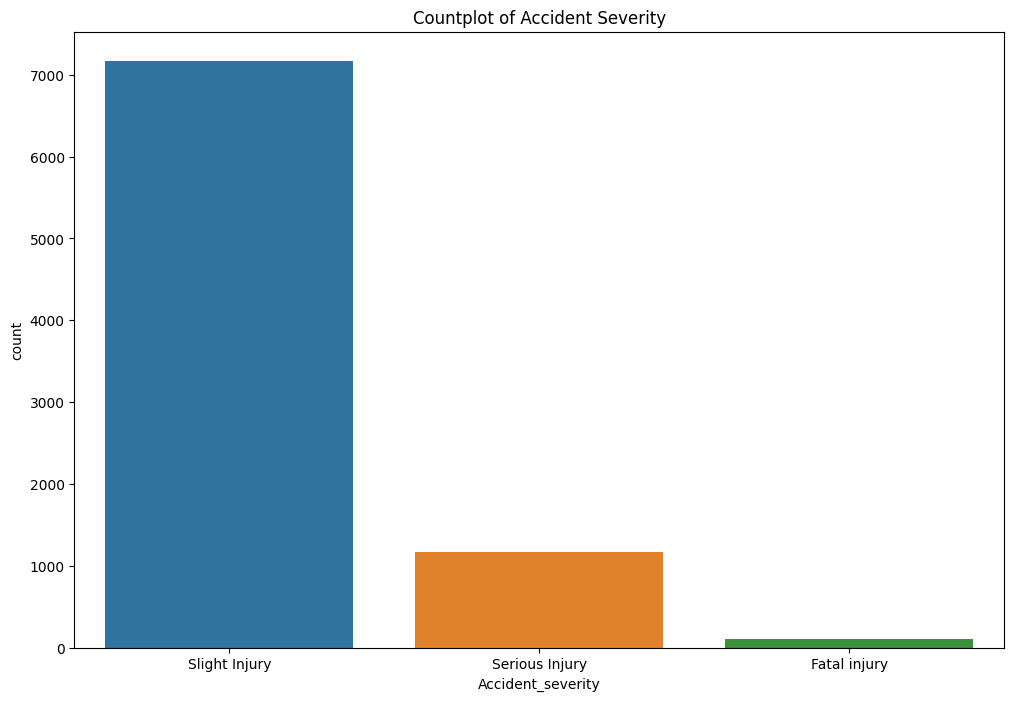

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='Accident_severity',data=df)
plt.title('Countplot of Accident Severity')
plt.show()

## We can see data is imbalanced

In [25]:
df['Time'].unique()

array(['17:02:00', '1:06:00', '17:20:00', ..., '7:24:00', '2:47:00',
       '16:26:00'], dtype=object)

In [26]:
time_series=pd.to_datetime(df['Time'],format="%H:%M:%S")

In [27]:
rounded_times=time_series.dt.round('30min')

In [28]:
rounded_times_str = rounded_times.dt.strftime('%H:%M:%S')

In [29]:
pd.DataFrame({'Time':df['Time'],'Latest time':rounded_times_str})

,Time,Latest time
1,17:02:00,17:00:00
3,1:06:00,01:00:00
7,17:20:00,17:30:00
8,17:20:00,17:30:00
9,17:20:00,17:30:00
...,...,...
12309,9:05:00,09:00:00
12312,18:00:00,18:00:00
12313,13:55:00,14:00:00
12314,13:55:00,14:00:00


In [30]:
df.drop('Time',axis=1,inplace=True)

In [31]:
df=pd.concat([rounded_times_str,df],axis=1)

In [32]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:00:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,na,Unknown,Not a Pedestrian,Overtaking,Slight Injury
3,01:00:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
7,17:30:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,1,U-Turn,na,na,na,na,Unknown,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:30:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,1,Going straight,Pedestrian,Male,Under 18,3,Driver,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:30:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,1,U-Turn,Passenger,Male,18-30,3,Driver,Not a Pedestrian,Moving Backward,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,09:00:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,Unknown,...,2,Going straight,Driver or rider,Male,18-30,3,Driver,Not a Pedestrian,Driving to the left,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,1,Other,na,na,na,na,Driver,Not a Pedestrian,No distancing,Slight Injury
12313,14:00:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,1,Other,Driver or rider,Male,31-50,3,Driver,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,14:00:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,1,Other,na,na,na,na,Driver,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [33]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int

In [34]:
(df['Accident_severity'].value_counts()/8439)*100

Accident_severity
Slight Injury     84.950824
Serious Injury    13.876052
Fatal injury       1.173125
Name: count, dtype: float64

In [35]:
categorical_columns=df.select_dtypes('object')

In [36]:
categorical_columns

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:00:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Vehicle with vehicle collision,Going straight,na,na,na,na,Unknown,Not a Pedestrian,Overtaking,Slight Injury
3,01:00:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
7,17:30:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,Vehicle with vehicle collision,U-Turn,na,na,na,na,Unknown,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:30:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Collision with roadside-parked vehicles,Going straight,Pedestrian,Male,Under 18,3,Driver,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:30:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Collision with roadside-parked vehicles,U-Turn,Passenger,Male,18-30,3,Driver,Not a Pedestrian,Moving Backward,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,09:00:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,Unknown,...,Collision with roadside objects,Going straight,Driver or rider,Male,18-30,3,Driver,Not a Pedestrian,Driving to the left,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Not a Pedestrian,No distancing,Slight Injury
12313,14:00:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,3,Driver,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,14:00:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [37]:
#from scipy.stats import chi2_contingency
#scores={}
#for cat_column in categorical_columns:
   # contingency_table = pd.crosstab(df[cat_column], df['Accident_severity'])
    #chi2, p, _, _ = chi2_contingency(contingency_table)
    #scores[cat_column]=p
    
    #if p < 0.05:
        #print(f"{cat_column} is statistically significant for classification.")
    

Time is statistically significant for classification.
Day_of_week is statistically significant for classification.
Age_band_of_driver is statistically significant for classification.
Driving_experience is statistically significant for classification.
Area_accident_occured is statistically significant for classification.
Types_of_Junction is statistically significant for classification.
Light_conditions is statistically significant for classification.
Cause_of_accident is statistically significant for classification.
Accident_severity is statistically significant for classification.


In [38]:
#scores

{'Time': 1.611642837845572e-23,
 'Day_of_week': 5.987855927376041e-06,
 'Age_band_of_driver': 5.1783677580268485e-08,
 'Sex_of_driver': 0.2048512795844874,
 'Educational_level': 0.8117864056331434,
 'Vehicle_driver_relation': 0.4817422719348742,
 'Driving_experience': 0.04455698682330822,
 'Type_of_vehicle': 0.06371868565690174,
 'Owner_of_vehicle': 0.31603375664145195,
 'Service_year_of_vehicle': 0.8796203227701151,
 'Area_accident_occured': 0.0026148807166028786,
 'Lanes_or_Medians': 0.32585894418941413,
 'Road_allignment': 0.6489829821584745,
 'Types_of_Junction': 1.8119940224720726e-05,
 'Road_surface_type': 0.4211236271651424,
 'Road_surface_conditions': 0.45659760149287054,
 'Light_conditions': 4.427676599155889e-08,
 'Weather_conditions': 0.0566651634258084,
 'Type_of_collision': 0.5885866537554889,
 'Vehicle_movement': 0.05163865697110044,
 'Casualty_class': 0.8670231263803729,
 'Sex_of_casualty': 0.7022871716532539,
 'Age_band_of_casualty': 0.07696479143204497,
 'Casualty_seve

In [39]:
#scores=pd.Series(scores)

<Axes: >

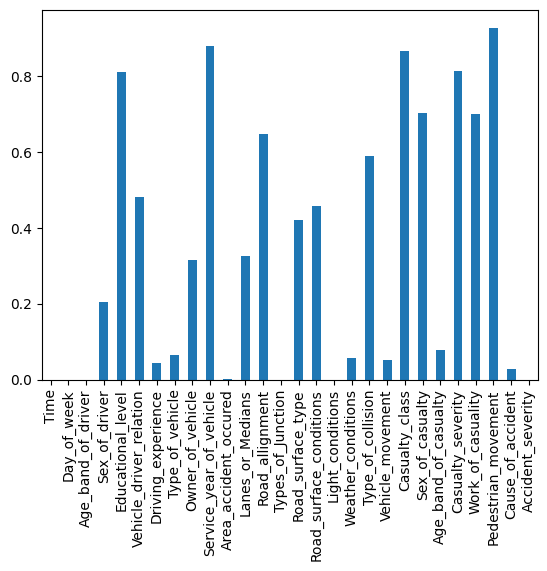

In [40]:
#scores.plot(kind='bar')

## Whichever bar is high is not useful for prediction

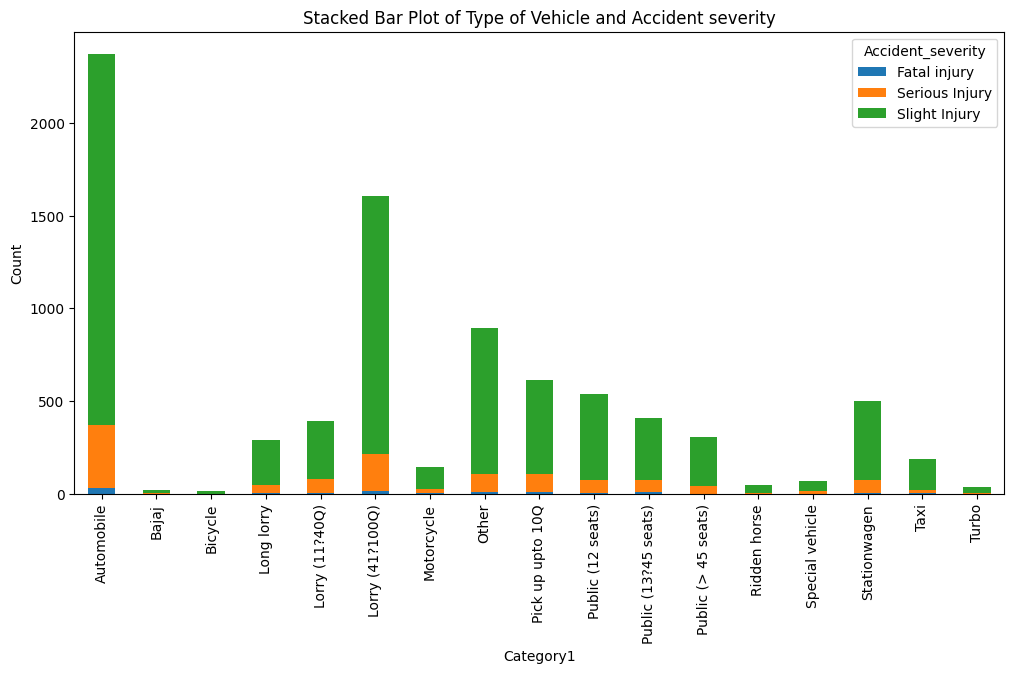

In [41]:
vehicle_crosstab=pd.crosstab(df['Type_of_vehicle'],df['Accident_severity'])
vehicle_crosstab.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('Stacked Bar Plot of Type of Vehicle and Accident severity')
plt.xlabel('Category1')
plt.ylabel('Count')
plt.show()

In [42]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:00:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,na,Unknown,Not a Pedestrian,Overtaking,Slight Injury
3,01:00:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
7,17:30:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,1,U-Turn,na,na,na,na,Unknown,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:30:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,1,Going straight,Pedestrian,Male,Under 18,3,Driver,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:30:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,1,U-Turn,Passenger,Male,18-30,3,Driver,Not a Pedestrian,Moving Backward,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,09:00:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,Unknown,...,2,Going straight,Driver or rider,Male,18-30,3,Driver,Not a Pedestrian,Driving to the left,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,1,Other,na,na,na,na,Driver,Not a Pedestrian,No distancing,Slight Injury
12313,14:00:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,1,Other,Driver or rider,Male,31-50,3,Driver,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,14:00:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,1,Other,na,na,na,na,Driver,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder=OneHotEncoder(sparse=False,drop='first')

In [45]:
categorical_columns=df.select_dtypes('object')

In [46]:
categorical_columns.drop('Accident_severity',axis=1,inplace=True)

In [47]:
encoded_data=encoder.fit_transform(categorical_columns)

C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
encoded_data=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())

In [49]:
numerical_columns=['Number_of_vehicles_involved','Number_of_casualties','Accident_severity']

In [50]:
numerical_columns

['Number_of_vehicles_involved', 'Number_of_casualties', 'Accident_severity']

In [51]:
combined_data=pd.concat([encoded_data,df[numerical_columns]],axis=1)

In [52]:
combined_data

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Slight Injury
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Slight Injury
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Slight Injury
12312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Slight Injury
12313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,Serious Injury
12314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Slight Injury


In [53]:
combined_data.dropna(inplace=True)

In [54]:
combined_data.isnull().sum()

Time_00:30:00                  0
Time_01:00:00                  0
Time_01:30:00                  0
Time_02:00:00                  0
Time_02:30:00                  0
                              ..
Cause_of_accident_Turnover     0
Cause_of_accident_Unknown      0
Number_of_vehicles_involved    0
Number_of_casualties           0
Accident_severity              0
Length: 219, dtype: int64

In [55]:
combined_data

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Slight Injury
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Slight Injury
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Slight Injury
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Slight Injury
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,Slight Injury
8434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,Slight Injury
8435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,Slight Injury
8437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Slight Injury


In [56]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
combined_data['Accident_severity']=oe.fit_transform(combined_data['Accident_severity'].values.reshape(-1,1))

In [57]:
combined_data['Accident_severity']

1       2.0
3       2.0
7       2.0
8       2.0
9       1.0
       ... 
8433    2.0
8434    2.0
8435    2.0
8437    2.0
8438    2.0
Name: Accident_severity, Length: 6274, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X=combined_data.drop('Accident_severity',axis=1)
y=combined_data['Accident_severity']

In [60]:
X

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
8434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
8435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
8437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [61]:
y

1       2.0
3       2.0
7       2.0
8       2.0
9       1.0
       ... 
8433    2.0
8434    2.0
8435    2.0
8437    2.0
8438    2.0
Name: Accident_severity, Length: 6274, dtype: float64

In [62]:
from imblearn.over_sampling import RandomOverSampler

In [63]:
ros=RandomOverSampler(sampling_strategy='auto')
X_res,y_res=ros.fit_resample(X,y)

<Axes: ylabel='count'>

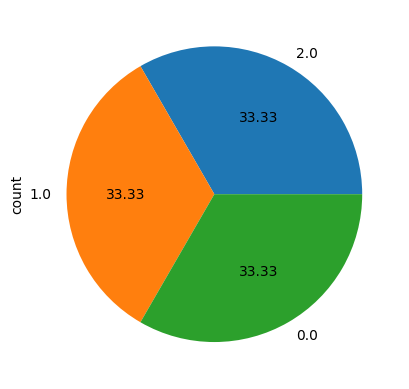

In [64]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [65]:
X_res.shape

(16257, 218)

In [66]:
y_res.shape

(16257,)

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [68]:
X_train

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties
13391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
14854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4861,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
3946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
15470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
15795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [69]:
X_test

,Time_00:30:00,Time_01:00:00,Time_01:30:00,Time_02:00:00,Time_02:30:00,Time_03:00:00,Time_03:30:00,Time_04:00:00,Time_04:30:00,Time_05:00:00,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
12190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
8459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
11018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [70]:
y_train

13391    1.0
14854    1.0
4861     2.0
3946     2.0
15470    1.0
        ... 
13418    1.0
5390     2.0
860      2.0
15795    1.0
7270     0.0
Name: Accident_severity, Length: 13005, dtype: float64

In [71]:
y_test

304      2.0
2087     2.0
1213     2.0
2439     2.0
12190    1.0
        ... 
13662    1.0
8459     0.0
5557     2.0
11018    0.0
647      2.0
Name: Accident_severity, Length: 3252, dtype: float64

In [72]:
from sklearn.pipeline import Pipeline

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
rfc=RandomForestClassifier()

In [76]:
classifiers ={
    'Random Forest': (RandomForestClassifier(), {'n_estimators':[50,100,10,200],
    'max_depth':[None,10,20,5,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]}),




    'Logistic Regression': (LogisticRegression(), {'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'max_iter': [50, 100, 200],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'class_weight': [None, 'balanced']}),




     'dt':(DecisionTreeClassifier(),{'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']}),





    'adc':(AdaBoostClassifier(),{'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeRegressor(max_depth=1)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']}),



    'etc':(ExtraTreesClassifier(),{ 'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]}),



    'gdc':(GradientBoostingClassifier(),{'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'loss': ['log_loss', 'exponential'],
    'max_features': [None, 'sqrt', 'log2', 0.5]}),





    'cbc':(CatBoostClassifier(),{'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS']}),





    'xgb':(XGBClassifier(),{ 'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]}),




    'knn':(KNeighborsClassifier(),{'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']}),


    'gnb':(GaussianNB(),{'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]}),


    'svc':(SVC(),{'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto', 0.1, 1],  
    'coef0': [0.0, 0.1, 0.5]})
}

# Perform grid search for each classifier
for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Evaluate the model on the test set
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)


KeyboardInterrupt



In [77]:
params_grid={
    'n_estimators':[50,100,10,200],
    'max_depth':[None,10,20,5,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [78]:
grid_search=GridSearchCV(estimator=rfc,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [79]:
#grid_search.fit(X_train,y_train)

In [80]:
#grid_search.best_params_

In [81]:
dt=DecisionTreeClassifier()

In [82]:
params_grid={'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']}

In [83]:
grid_search=GridSearchCV(estimator=dt,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [84]:
#grid_search.fit(X_train,y_train)

In [85]:
#grid_search.best_params_

In [86]:
lr=LogisticRegression()

In [87]:
params_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'max_iter': [50, 100, 200],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'class_weight': [None, 'balanced']}

In [88]:
grid_search=GridSearchCV(estimator=lr,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [89]:
#grid_search.fit(X_train,y_train)

In [90]:
#grid_search.best_params_

In [91]:
adc=AdaBoostClassifier()

In [92]:
params_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeRegressor(max_depth=1)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [93]:
grid_search=GridSearchCV(estimator=adc,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [94]:
#grid_search.fit(X_train,y_train)

In [95]:
#grid_search.best_params_

In [96]:
etc=ExtraTreesClassifier()

In [97]:
params_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]}

In [98]:
grid_search=GridSearchCV(estimator=etc,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [99]:
#grid_search.fit(X_train,y_train)

In [100]:
#grid_search.best_params_

In [101]:
gdc=GradientBoostingClassifier()

In [102]:
params_grid={'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'loss': ['log_loss', 'exponential'],
    'max_features': [None, 'sqrt', 'log2', 0.5]}

In [103]:
grid_search=GridSearchCV(estimator=gdc,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [104]:
#grid_search.fit(X_train,y_train)

In [105]:
#grid_search.best_params_

In [106]:
cbc=CatBoostClassifier()

In [107]:
params_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS']}

In [108]:
grid_search=GridSearchCV(estimator=cbc,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [109]:
#grid_search.fit(X_train,y_train)

In [110]:
#grid_search.best_params_

In [111]:
svc=SVC()

In [112]:
params_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto', 0.1, 1],  # You can adjust these values based on your data
    'coef0': [0.0, 0.1, 0.5]  # Only relevant for 'poly' and 'sigmoid' kernels
}

In [113]:
grid_search=GridSearchCV(estimator=svc,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [114]:
#grid_search.fit(X_train,y_train)

In [115]:
#grid_search.best_params_

In [116]:
knn=KNeighborsClassifier()

In [117]:
gnb=GaussianNB()

In [118]:
xgb=XGBClassifier()

In [119]:
params_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

In [120]:
grid_search=GridSearchCV(estimator=knn,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [121]:
#grid_search.fit(X_train,y_train)
#grid_search.best_params_

In [122]:
params_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]
}

In [123]:
grid_search=GridSearchCV(estimator=gnb,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [124]:
#grid_search.fit(X_train,y_train)
#grid_search.best_params_

In [125]:
params_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [126]:
grid_search=GridSearchCV(estimator=xgb,param_grid=params_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [127]:
#grid_search.fit(X_train,y_train)
#grid_search.best_params_

In [128]:
algo={
    'Rfc':RandomForestClassifier(max_depth=30,min_samples_leaf=2,min_samples_split=2,n_estimators=10),
    'dtc':DecisionTreeClassifier(class_weight=None,criterion='gini',max_depth=10,max_features='log2',min_samples_leaf=4,min_samples_split=2,splitter='best'),
    'lr':LogisticRegression(C=0.001,class_weight=None,max_iter=50,multi_class='auto',penalty='l2',solver='lbfgs'),
    'adc':AdaBoostClassifier(algorithm='SAMME',base_estimator=DecisionTreeClassifier(max_depth=1),learning_rate=0.01,n_estimators=50),
     'etc':ExtraTreesClassifier(bootstrap=True,criterion='gini',max_depth=10,max_features=None,min_samples_leaf=2,min_samples_split=10,n_estimators=100),
    'knn':KNeighborsClassifier(algorithm='ball_tree',metric='euclidean',n_neighbors=7,p=1,weights='uniform'),
    'gnb':GaussianNB(priors=None),
    'xgb':XGBClassifier(colsample_bytree=1.0,learning_rate=0.01,max_depth=7,n_estimators=100,subsample=0.8),
    'cbc':CatBoostClassifier(bootstrap_type='MVS',iterations=100,learning_rate=0.2),
    'svc':SVC(C=0.1,coef0=0.5,degree=4,gamma='scale',kernel='poly'),
    'gdc':GradientBoostingClassifier(learning_rate=0.1,loss='log_loss',max_depth=5,max_features='sqrt',min_samples_leaf=4,min_samples_split=5,n_estimators=100,subsample=1.0)
}

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
algo_scores=pd.DataFrame()
for key,model in algo.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{key}:{accuracy}")
    algo_scores.loc['Accuracy', key] = accuracy

Rfc:0.965559655596556
dtc:0.48154981549815495
lr:0.5556580565805658


C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


adc:0.4231242312423124
etc:0.8440959409594095
knn:0.8253382533825339
gnb:0.5132226322263223
xgb:0.747539975399754
0:	learn: 1.0307643	total: 162ms	remaining: 16s
1:	learn: 0.9858581	total: 181ms	remaining: 8.88s
2:	learn: 0.9529208	total: 199ms	remaining: 6.43s
3:	learn: 0.9237626	total: 217ms	remaining: 5.2s
4:	learn: 0.8989817	total: 235ms	remaining: 4.47s
5:	learn: 0.8750187	total: 252ms	remaining: 3.95s
6:	learn: 0.8513167	total: 270ms	remaining: 3.59s
7:	learn: 0.8327415	total: 288ms	remaining: 3.31s
8:	learn: 0.8120684	total: 305ms	remaining: 3.08s
9:	learn: 0.7979483	total: 323ms	remaining: 2.9s
10:	learn: 0.7849781	total: 341ms	remaining: 2.76s
11:	learn: 0.7719102	total: 357ms	remaining: 2.62s
12:	learn: 0.7586668	total: 374ms	remaining: 2.5s
13:	learn: 0.7539203	total: 391ms	remaining: 2.4s
14:	learn: 0.7439150	total: 409ms	remaining: 2.32s
15:	learn: 0.7386806	total: 427ms	remaining: 2.24s
16:	learn: 0.7297354	total: 444ms	remaining: 2.17s
17:	learn: 0.7176955	total: 461ms	r

In [131]:
algo_scores

,Rfc,dtc,lr,adc,etc,knn,gnb,xgb,cbc,svc,gdc
Accuracy,0.96556,0.48155,0.555658,0.423124,0.844096,0.825338,0.513223,0.74754,0.849323,0.864084,0.837946


In [132]:
best_algo = algo_scores.idxmax(axis=1)[0]
best_accuracy = algo_scores.loc['Accuracy', best_algo]

In [133]:
print(best_algo,best_accuracy)

Rfc 0.965559655596556


In [134]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [135]:

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Use softmax for multiclass classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/80
407/407 [==============================] - 3s 3ms/step - loss: 1.0250 - accuracy: 0.4468 - val_loss: 0.7077 - val_accuracy: 0.6224
Epoch 2/80
407/407 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 0.6314 - val_loss: 0.4747 - val_accuracy: 0.6682
Epoch 3/80
407/407 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.6634 - val_loss: 0.4663 - val_accuracy: 0.6830
Epoch 4/80
407/407 [==============================] - 1s 3ms/step - loss: 0.4899 - accuracy: 0.6652 - val_loss: 0.4632 - val_accuracy: 0.6676
Epoch 5/80
407/407 [==============================] - 2s 4ms/step - loss: 0.4789 - accuracy: 0.6652 - val_loss: 0.4646 - val_accuracy: 0.6676
Epoch 6/80
407/407 [==============================] - 2s 5ms/step - loss: 0.4775 - accuracy: 0.6741 - val_loss: 0.4669 - val_accuracy: 0.6679
Epoch 7/80
407/407 [==============================] - 2s 4ms/step - loss: 0.4805 - accuracy: 0.6784 - val_loss: 0.4608 - val_accuracy: 0.6922
Epoch 

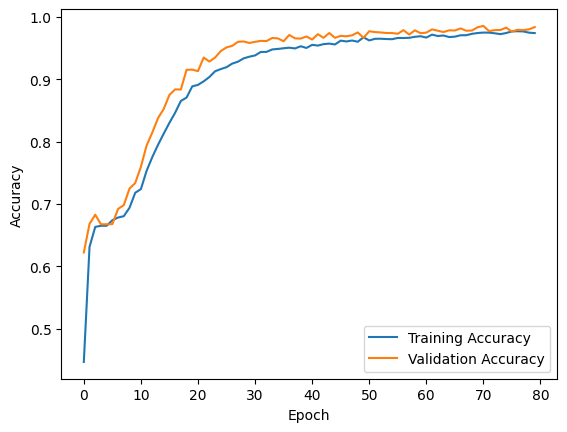

In [136]:
# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

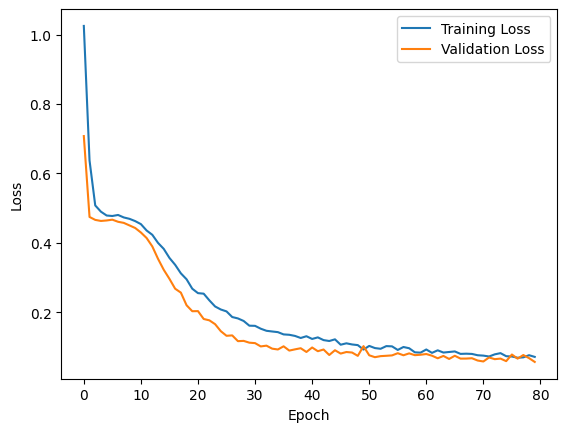

In [137]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
pipeline=Pipeline([
  ('rfc',RandomForestClassifier(max_depth=30,min_samples_leaf=2,min_samples_split=2,n_estimators=10))
])

In [140]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('rfc',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                                        n_estimators=10))])

In [141]:
from sklearn.model_selection import StratifiedKFold

In [142]:
skf=StratifiedKFold(5,shuffle=True,random_state=1)
scores=cross_val_score(pipeline,X,y,cv=skf,scoring='accuracy')
print(scores)

[0.86454183 0.86374502 0.86454183 0.86294821 0.86363636]


In [143]:
y_pred=pipeline.predict(X_test)

In [144]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1084
         1.0       0.94      0.97      0.95      1076
         2.0       0.97      0.93      0.95      1092

    accuracy                           0.97      3252
   macro avg       0.97      0.97      0.97      3252
weighted avg       0.97      0.97      0.97      3252



In [146]:
from sklearn.metrics import confusion_matrix

<Axes: >

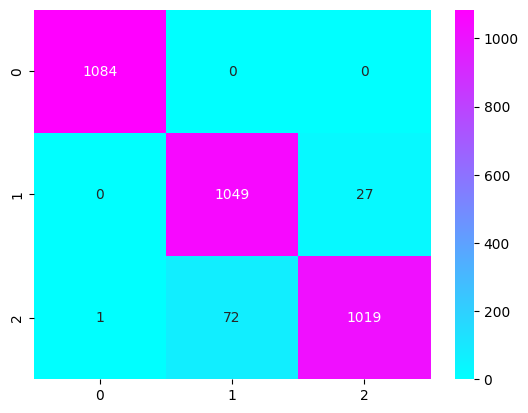

In [147]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='cool',fmt="d")

In [148]:
import pickle

In [153]:
pickle.dump(model,open('dlmodel.pkl','wb'))

In [154]:
pickle.dump(oe,open('road_oe.pkl','wb'))
pickle.dump(encoder,open('road_encoder.pkl','wb'))

In [155]:
pickle.dump(df,open('road_df.pkl','wb'))

In [152]:
np.argmax(model.predict([[0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
1.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
1.0,
0.0,
0.0,
0.0,
0.0,
1.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
1.0,
1.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
1.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
3.0,
2.0
]]))

ValueError: in user code:

    File "C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 218), found shape=(None, 106)


In [ ]:
df[df['Accident_severity']=='Slight Injury']